# Taux de désabonnement des clients d'une entreprise

Le taux de désabonnement des clients se produit lorsque les clients ou les abonnés cessent de faire affaire avec une entreprise ou un service. Une entreprise veut savoir quels sont les clients qui vont se désabonner en examinant certains des attributs importants et en y appliquant le Machine Learning ou le Deep Learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist

## Informations sur les données

In [75]:
data = pd.read_csv("data.csv")
data.head(5)

,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_ligne       10000 non-null  int64  
 1   ID_Client       10000 non-null  int64  
 2   Nom             10000 non-null  object 
 3   Score_Credit    10000 non-null  int64  
 4   Pays            10000 non-null  object 
 5   Sex             10000 non-null  object 
 6   Age             10000 non-null  int64  
 7   Tenure          10000 non-null  int64  
 8   Balance         10000 non-null  float64
 9   Num_Produit     10000 non-null  int64  
 10  il_a_CrCard     10000 non-null  int64  
 11  Membre_actif    10000 non-null  int64  
 12  Salaire_estime  10000 non-null  float64
 13  Exited          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [20]:
data.describe()

,num_ligne,ID_Client,Score_Credit,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
data.columns

Index(['num_ligne', 'ID_Client', 'Nom', 'Score_Credit', 'Pays', 'Sex', 'Age',
       'Tenure', 'Balance', 'Num_Produit', 'il_a_CrCard', 'Membre_actif',
       'Salaire_estime', 'Exited'],
      dtype='object')

Nous recherchons les variables qui permettre de prévoir un éventuel désabonnement d'un client. Pour cela, nous allons d'abords définir nos *Features* et notre *Target*. L'objectif est de prédire en fonction des données les clients qui vont potentiellement se désabonner. Notre Target sera donc *'Exited'* déjà défini numériquement : 0 = Non, 1 = Oui.

Nous allons maintenant repérer les *Features* qui peuvent avoir une corrélation avec cette variable *'Exited'*.

## Datacleaning

In [6]:
qualitatives_columns = list(data.describe(include=['object']))
qualitatives_columns

['Nom', 'Pays', 'Sex']

In [8]:
data['Pays'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Pays, dtype: int64

In [21]:
data['Sex'].value_counts()

Male      5457
Female    4543
Name: Sex, dtype: int64

Les *Features* *'Sex'* et *'Pays'* sont des variables sous forme d'objet, les transformer sous forme d'entier serait intéressant pour la création de notre modèle.

In [76]:
from sklearn import preprocessing

encoder_sex = preprocessing.LabelEncoder()
data['Sex'] = encoder_sex.fit_transform(data['Sex'])
data.head(5)

,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [77]:
pd.get_dummies(data.Pays)

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [78]:
data = pd.concat([data, pd.get_dummies(data.Pays)], 1)
data.head()

,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited,France,Germany,Spain
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [99]:
qualitatives_columns = list(data.describe(include=['object']))
qualitatives_columns

['Nom', 'Pays']

In [83]:
data.corrwith(data["Exited"]).round(1)

num_ligne        -0.0
ID_Client        -0.0
Score_Credit     -0.0
Sex              -0.1
Age               0.3
Tenure           -0.0
Balance           0.1
Num_Produit      -0.0
il_a_CrCard      -0.0
Membre_actif     -0.2
Salaire_estime    0.0
Exited            1.0
France           -0.1
Germany           0.2
Spain            -0.1
dtype: float64

Etant amené à résoudre un problème de classification, une sélection X² serait peut-être plus adapté pour sélectionner nos variables.

## Modèle 

In [186]:
x = data.drop(['num_ligne', 'ID_Client', 'Nom', 'Pays', 'Exited'], axis=1)
y = data['Exited'].copy()

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [187]:
x_app, x_test, y_app, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### RandomForestClassifier

Un modèle de classification permettrait de répondre à l'objectif. Tentons une première approche à partir d'un modèle de RandomForestClassifier.

In [244]:
model = RandomForestClassifier()
model.fit(x_app, y_app)

#Prédiction sur l’échantillon test
y_pred = model.predict(x_app)

In [245]:
param_grid = {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}
param_grid

{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}

In [246]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]})

In [247]:
grid_search.fit(x_app, y_app)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]})

In [248]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [249]:
#Grid search sur notre dernier modèle
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(max_features=4, n_estimators=30)

In [250]:
y_pred = best_model.predict(x_test)

### Evaluation

In [251]:
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
print("RMSE :\t ", final_rmse)

RMSE :	  0.36606010435446257


In [252]:
best_model.score(x_test, y_test)

0.866

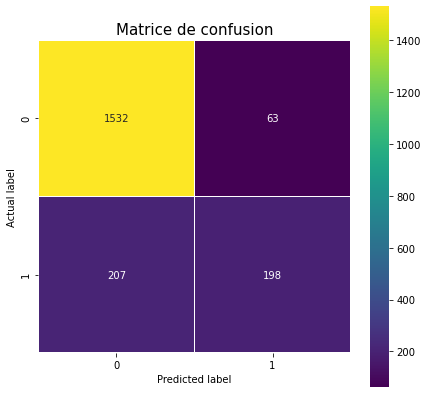

In [180]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

c_m = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(c_m, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Matrice de confusion", size = 15)
plt.show()

D'après notre matrice de confusion, ce modèle identifie correctement près de 96% des clients pour la classe 0 ('Exited' 0). La classe 1 ('Exited'1) contient pour elle près de 50% de faux négatifs, c'est à dire que 50% des clients qui seraient amenés à se trouver dans la classe 1 dans la réalité, sont considérés dans la classe 0 par le modèle. Ces résultats nous amèneraient à davantage améliorer ce dernier.

## Réseau de Neurones

Une autre approche serait de créer un réseau de neurones afin d'avoir un modèle peut-être plus performant sur ce type de Dataset.

In [130]:
import tensorflow as tf
tf.__version__

'2.4.0'

### Création du modèle

In [229]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(12,)),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [230]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 32)                416       
_________________________________________________________________
dense_40 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 33        
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


In [241]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_app, y_app, epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5118 - accuracy: 0.7916
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5019 - accuracy: 0.7989
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5089 - accuracy: 0.7938
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5002 - accuracy: 0.8001
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4971 - accuracy: 0.8024
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5044 - accuracy: 0.7970
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5095 - accuracy: 0.7933
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.8001
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4975 - accuracy: 0.8021
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7855

### Evaluation

In [242]:
val_loss, val_acc = model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.5036 - accuracy: 0.7975


A partir de notre réseau de neurone, nous obtenons une Accuracy de 80%, moins que notre modèle RandomForestClassifier.